In [157]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Independent sum of two distributions

In the lecture we showed from first principles that the (independent) sum of two uniform distributions is the triangular distribution.

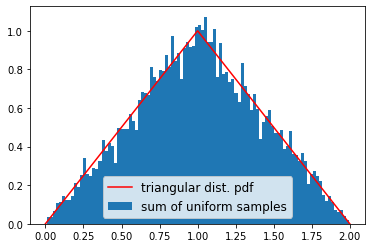

In [158]:
x = np.linspace(0,2,1000)
# Pythonesque way of defining the density of triangular distribution
y = np.where(x < 1, x, 2-x)
plt.plot(x,y, color = 'red', label = 'triangular dist. pdf')
# Sample independently from two uniform distributions
N = 10000
seed = 101
s1 = stats.uniform.rvs(size = N, random_state = seed)
# Check out what happens if both sets of samples are seeded in the same way by removing the + 1. Why?
s2 = stats.uniform.rvs(size = N, random_state = seed + 1)
s1_plus_s2 = s1 + s2
plt.hist(s1_plus_s2, int(np.sqrt(N)), density = True, label = 'sum of uniform samples')
plt.legend(fontsize=12)
plt.show()

Normal distributions have the nice property that the sum of two normal distributions is also normal. Specifically,  

$$
N(\mu_1,\sigma_1) + N(\mu_2,\sigma_2) = N\left(\mu_1+\mu_2, \sqrt{\sigma_1^2+\sigma_2^2}\right).
$$

We can check that this is indeed the case in the same way as above.

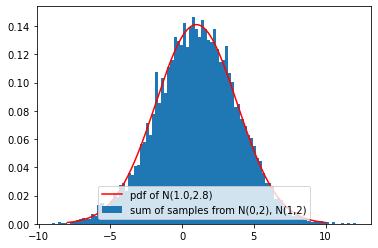

In [159]:
x = np.linspace(-8,10,10000)
mu1, sigma1 = 0, 2
mu2, sigma2 = 1, 2
y = stats.norm.pdf(x, loc = mu1+mu2, scale = np.sqrt(sigma1**2 + sigma2**2))
# Prepare label for the plot
dist_label = 'pdf of N({mu:.1f},{sigma:.1f})'.format(mu=mu1+mu2, sigma = np.sqrt(sigma1**2 + sigma2**2))
plt.plot(x,y, color = 'red', label = dist_label)
N = 10000
seed = 101
s1 = stats.norm.rvs(mu1,sigma1,size = N, random_state = seed)
s2 = stats.norm.rvs(mu2,sigma2,size = N, random_state = seed + 1)
s1_plus_s2 = s1 + s2
# Prepare label for the histogram
hist_label = 'sum of samples from N({mu1:.0f},{sigma1:.0f}), N({mu2:.0f},{sigma2:.0f})'
hist_label = hist_label.format(mu1 = mu1, sigma1 = sigma1, mu2 = mu2, sigma2 = sigma2)
plt.hist(s1_plus_s2, int(np.sqrt(N)), density = True, label=hist_label)
plt.legend(fontsize = 10, loc = 'lower center')
plt.show()

## Independent multiplication of distributions

In the lecture we showed from first principles how to compute the density of an independent product of uniform distributions.

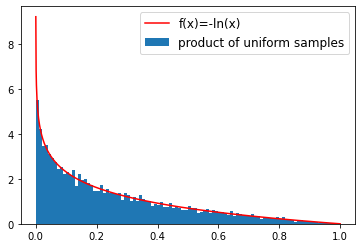

In [160]:
# Need to exclude 0 to avoid error since -np.log(0) is Inf
x = np.linspace(0.0001,1,1000)
y = -np.log(x)
plt.plot(x,y, color = 'red', label = 'f(x)=-ln(x)')
# Sample independently from two uniform distributions
N = 10000
seed = 101
s1 = stats.uniform.rvs(size = N, random_state = seed)
# Check out what happens if both sets of samples are seeded in the same way by removing the + 1. Why?
s2 = stats.uniform.rvs(size = N, random_state = seed + 1)
s1_plus_s2 = s1 * s2
plt.hist(s1_plus_s2, int(np.sqrt(N)), density = True, label = 'product of uniform samples')
plt.legend(fontsize=12)
plt.show()

## Studying the sample mean

We consider sample means from Gamma-distributed deviates (with $\alpha =2.5$). We can compute the sample mean of the sample means. Since $E[\overline{\mu_n}]=E[\mu]$, this value should be close to $\alpha =2.5$ (the mean of the Gamma distribution).

We then compute the sample standard deviation of the sample means. Since $StDev[\overline{\mu_n}]=\frac{StDev[\mu]}{\sqrt{n}}$, the sample standard deviation of the sample means should be close to this value. This is indeed the case for sufficiently large values of $N$ (try with $N=1000$). This is a general phenomenon in statistics: the higher the moment, the higher the number of samples required to estimate them correctly.

True std of sample means:0.158
Sample std of sample means:0.045


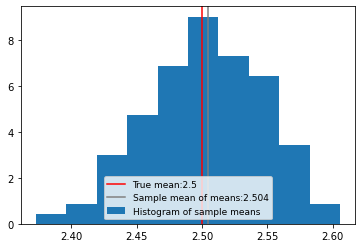

In [161]:
alpha = 2.5
M = 1000
N = 100
seed = 100
# Generate an MxN array of samples
samples = stats.gamma.rvs(a = alpha, size = [M,N], random_state = seed)
stdev = stats.gamma.std(a = alpha)
# Pythonesque way of computing sample means along the columns of the array
sample_means = np.mean(samples, axis = 0)
sample_means_mean = np.mean(sample_means)
sample_means_stdev = np.std(sample_means)
plt.hist(sample_means, int(np.sqrt(N)), density = True, label = 'Histogram of sample means')
plt.axvline(x=alpha, color='red', label = 'True mean:{:.1f}'.format(alpha))
plt.axvline(x=sample_means_mean, color='grey', label='Sample mean of means:{:.3f}'.format(sample_means_mean))
print('True std of sample means:{:.3f}'.format(stdev/np.sqrt(N)))
print('Sample std of sample means:{:.3f}'.format(sample_means_stdev))
plt.legend(fontsize = 9, loc = 'lower center')
plt.show()

## The Law of Large Numbers: Monte-Carlo integration

The classic example of Monte-Carlo integration is the approximation of the following integral

$$
\int_{-1}^1\int_{-1}^1 1_{D}(x,y) ~dx dy
$$

Where $1_D(x,y)=1$ if $(x,y)\in D$ and 0 otherwise, and $D=\{(x,y)\mid x^2+y^2 = 1\}$ is the unit disk around the origin. In other words, we want to evaluate the area of a disk of radius 1, which is just $\pi$. 

Using Monte-Carlo integration we sample from the measure $1_D(\mu)$ where $\mu$ is the uniform distribution on $[-1,1]\times [-1,1]$ and compute the sample mean. This approaches the true integral $\frac{1}{4}\int_{-1}^1\int_{-1}^1 1_{D}(x,y) ~dx dy$ where 4 is the normalising factor in the density of the uniform distribution on $[-1,1]\times [-1,1]$. 

Observe that in order gain one extra significant digit in the approximation of $\pi$, _a lot more_ samples must be taken.

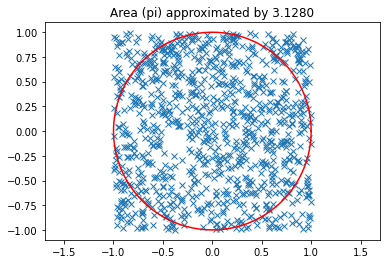

In [188]:
N = 1000
seed = 1
# Sample from the uniform distribution on [-1,1]x[-1,1]
samples = 2*stats.uniform.rvs(size=[N,2], random_state = seed) - 1
# Evaluate function to be integrated on samples
f_of_samples = np.where(samples[:,0]**2 + samples[:,1]**2 < 1, 1, 0)
# Compute approximation of area
approx_area = 4 * np.sum(f_of_samples) / N
plt.plot(samples[:,0],samples[:,1], 'x')
# Plot unit circle
theta = np.linspace(0,2 * np.pi,100)
plt.plot(np.cos(theta),np.sin(theta), color = 'red')
plt.title('Area (pi) approximated by {:.4f}'.format(approx_area))
plt.axis('equal')
plt.show()

## The Law of Large Numbers: visualisation

We plot samples of $\overline{\mu}_k, \overline{\mu}_{k+1},\ldots, \overline{\mu}_{k+N}$ to illustrate the LLN. We call such a $(N-k)$-tuple of samples a _sample path_ of the sample mean. The point of starting at $k$ rather than zero is that the path is otherwise extremely irregular near the origin, making visualisation difficult. As $n$ increased, all the samples of $\overline{\mu}_{k+n}$ cluster into a tighter and tighter interval around the true mean. For variety's sake we choose $\mu$ to be a $\chi^2$ distribution with 3 degrees of freedom, in particular $E[\mu] = 3$.

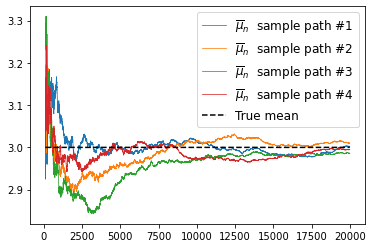

In [171]:
def sample_mean_path(samples, burn):
    size = samples.shape[0]
    path = np.zeros(size-burn)
    for i in range(burn,size):
        path[i-burn] = np.mean(samples[0:i+1])
    return path

# Number of sample paths to be drawn
path_number = 4
# Degrees of freedom for chi square distribution
df = 3
# Number of samples 'burned', i.e. sample means of size < burn are not displayed
burn = 100
seed = 1
N = 20000
x = np.arange(burn,N)
for i in range(path_number):
    #increment seed to get independent draws at each iteration
    samples = stats.chi2.rvs(df, size = N, random_state = seed+i)
    path = sample_mean_path(samples, burn)
    plt.plot(x, path, linewidth = 0.75, label = r'$\overline{\mu}_n~$ sample path #'+str(i+1))
# Add true mean
plt.plot(x, np.zeros(N-burn)+3, color = 'black', linestyle = 'dashed', label = 'True mean')
plt.legend(fontsize = 12)
plt.show()

Now, let's try the same thing with the Cauchy distribution!

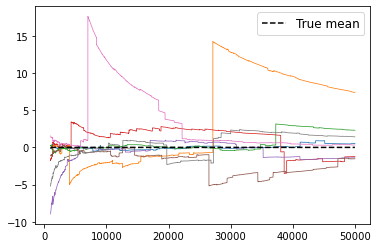

In [196]:
# Number of sample paths to be drawn
path_number = 8
# Number of samples 'burned', i.e. sample means of size < burn are not displayed
burn = 1000
seed = 2
N = 50000
x = np.arange(burn,N)
for i in range(path_number):
    #increment seed to get independent draws at each iteration
    samples = stats.cauchy.rvs(size = N, random_state = seed+i)
    path = sample_mean_path(samples, burn)
    plt.plot(x, path, linewidth = 0.75)
# Add true mean
plt.plot(x, np.zeros(N-burn), color = 'black', linestyle = 'dashed', label = 'True mean')
plt.legend(fontsize = 12)
plt.show()

## The Central Limit Theorem

We follow from the previous example ($\mu$ is a $\chi^2$ distribution with 3 d.o.f.) and repeat the experiment; but this time we center the sample paths (i.e. we substract $E[\mu]$) and we rescale by $\sqrt{n}$. We plot the mean and standard deviation of the distribution $N(0,StDev[\mu])$ towards which $\sqrt{n}\left(\overline{\mu}_n-E[\mu]\right)$ converges.

Standard Deviation = 2.45


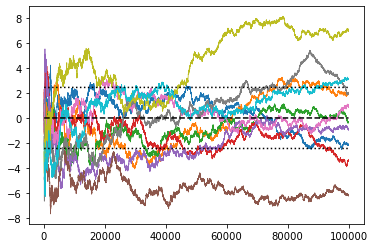

In [163]:
# Number of sample paths to be drawn
path_number = 10
# Degrees of freedom for chi square distribution
df = 3
# Number of samples 'burned', i.e. sample means of size < burn are not displayed
burn = 100
seed = 5
N = 100000
x = np.arange(burn,N)
# Scaling factor for the CTL
scaling = np.sqrt(x)
for i in range(path_number):
    #increment seed to get independent draws at each iteration
    samples = stats.chi2.rvs(df, size = N, random_state = seed+i)
    path = scaling * (sample_mean_path(samples, burn) - df)
    plt.plot(x, path, linewidth = 0.75)
mean = np.zeros(N-burn)
stdev = stats.chi2.std(df)
print('Standard Deviation = {:.2f}'.format(stdev))
plt.plot(x, mean, color = 'black', linestyle = 'dashed')
plt.plot(x, mean + stdev, color = 'black', linestyle = 'dotted')
plt.plot(x, mean - stdev, color = 'black', linestyle = 'dotted')
plt.show()

## Law of the Iterated Logarithm



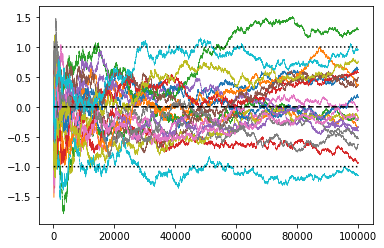

In [170]:
# Number of sample paths to be drawn
path_number = 20
# Degrees of freedom for chi square distribution
df = 3
# Number of samples 'burned', i.e. sample means of size < burn are not displayed
burn = 100
seed = 1
N = 100000
x = np.arange(burn,N)
# Scaling factor for the LIL
var = stats.chi2.var(df)
scaling = np.sqrt(x) / (np.sqrt(2 * var * np.log(np.log(x))))
for i in range(path_number):
    #increment seed to get independent draws at each iteration
    samples = stats.chi2.rvs(df, size = N, random_state = seed+i)
    path = scaling * (sample_mean_path(samples, burn) - df)
    plt.plot(x, path, linewidth = 0.5)
mean = np.zeros(N-burn)
plt.plot(x, mean, color = 'black', linestyle = 'dashed')
plt.plot(x, mean - 1, color = 'black', linestyle = 'dotted')
plt.plot(x, mean + 1, color = 'black', linestyle = 'dotted')
plt.show()